# **Imports**

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


# **Define the model**

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
class EmbeddingsClassifier(nn.Module):
    def __init__(self, input_dim, num_classes=2):
        super(EmbeddingsClassifier, self).__init__()

        self.fc1 = nn.Linear(in_features=768, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=num_classes)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [ ]:
from sklearn.linear_model import LogisticRegression
import torch

class LogisticRegressionClassifier:
    def __init__(self, input_dim, num_classes=2):
        # Initialize the Logistic Regression model
        self.model = LogisticRegression(max_iter=10000)

    def fit(self, X_train, y_train):
        # Train the model
        self.model.fit(X_train, y_train)

    def predict(self, X):
        # Predict class labels for samples in X
        return self.model.predict(X)

    def predict_proba(self, X):
        # Predict class probabilities for samples in X
        return self.model.predict_proba(X)

    def evaluate(self, X_test, y_test):
        # Evaluate accuracy on the test set
        return self.model.score(X_test, y_test)

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, input_dim=768, hidden_dims=[128, 64], num_classes=2):
        super(MLPClassifier, self).__init__()
        layers = []
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.3))  # Regularization
            input_dim = hidden_dim
        layers.append(nn.Linear(input_dim, num_classes))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


In [ ]:
import torch
import torch.nn as nn

class AttentionClassifier(nn.Module):
    def __init__(self, input_dim=768, num_classes=2):
        super(AttentionClassifier, self).__init__()
        self.attention = nn.Linear(input_dim, 1)  # Learn attention weights
        self.fc1 = nn.Linear(input_dim, 128)  # Hidden layer
        self.fc2 = nn.Linear(128, 64)  # Hidden layer
        self.fc3 = nn.Linear(64, num_classes)  # Output layer
        self.relu = nn.ReLU()  # Reuse ReLU activation

    def forward(self, x):
        # x: (batch_size, seq_len, input_dim)

        # 1. Calculate attention weights
        attention_weights = torch.softmax(self.attention(x), dim=1)  # (batch_size, seq_len, 1)

        # 2. Apply attention to embeddings (broadcasting the attention weights)
        weighted_input = attention_weights * x  # (batch_size, seq_len, input_dim)

        # 3. Aggregate (sum over the sequence dimension)
        aggregated = weighted_input.sum(dim=1)  # (batch_size, input_dim)

        # 4. Pass through fully connected layers
        x = self.relu(self.fc1(aggregated))  # (batch_size, 128)
        x = self.relu(self.fc2(x))  # (batch_size, 64)

        # 5. Final classification layer
        output = self.fc3(x)  # (batch_size, num_classes)

        return output


In [3]:
from transformers import AutoConfig, AutoModel
import torch
import torch.nn as nn

class TransformerClassifier(nn.Module):
    def __init__(self, transformer_model="bert-base-uncased", input_dim=768, num_classes=2):
        super(TransformerClassifier, self).__init__()
        # Create custom configuration with input_dim as hidden_size
        config = AutoConfig.from_pretrained(transformer_model)
        config.hidden_size = input_dim  # Customize hidden size
        self.transformer = AutoModel.from_config(config)  # Initialize transformer from scratch
        self.fc = nn.Linear(input_dim, num_classes)  # Fully connected layer for classification

    def forward(self, x):
        # Use input embeddings directly (ensure x matches input_dim)
        outputs = self.transformer(inputs_embeds=x)
        cls_token_output = outputs.last_hidden_state[:, 0, :]  # CLS token output
        return self.fc(cls_token_output)


NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
#mlp_model = MLPClassifier(input_dim=768, hidden_dims=[256, 128], num_classes=2)
#attention_model = AttentionClassifier(input_dim=768, num_classes=2)
transformer_model = TransformerClassifier(transformer_model="bert-base-uncased", input_dim=768, num_classes=2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

# **Import the embeddings**

In [10]:
np.random.seed(1)
childEmbeddings = np.concatenate((np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/OGIKidsEmbeddingsBathroom.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/cmuEmbeddingsBathroom.npy"),
                                  np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/OGIKidsEmbeddingsBar.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/cmuEmbeddingsBar.npy"),

                                  np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/OGIKidsEmbeddingsSupermarket.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/cmuEmbeddingsSupermarket.npy"),
                                  np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/OGIKidsEmbeddingsStairwell.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/cmuEmbeddingsStairwell.npy")))
np.random.shuffle(childEmbeddings)
childEmbeddings = childEmbeddings[0:23286]

adultEmbeddings = np.concatenate((np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/voxcelebEmbeddingsBathroom.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/CommonVoiceEmbeddingsBathroom.npy"),
                                  np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/voxcelebEmbeddingsBar.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/CommonVoiceEmbeddingsBar.npy"),
                                  np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/voxcelebEmbeddingsSupermarket.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/CommonVoiceEmbeddingsSupermarket.npy"),
                                  np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/voxcelebEmbeddingsStairwell.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/CommonVoiceEmbeddingsStairwell.npy")))
np.random.shuffle(adultEmbeddings)
print(childEmbeddings.shape)
print(adultEmbeddings.shape)

X = np.concatenate((childEmbeddings , adultEmbeddings))
y = np.concatenate((np.zeros(len(childEmbeddings)), np.ones(len(adultEmbeddings))))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

(23286, 768)
(23286, 768)


In [ ]:
import os

# Paths to the datasets
dataset_paths = {
    "VoxCeleb": "/content/drive/MyDrive/UC_COSMOS/New_Datasets/VoxCeleb/SupermarketIR",
    "Librispeech": "/content/drive/MyDrive/UC_COSMOS/New_Datasets/Librispeech/SupermarketIR",
    "CommonVoice": "/content/drive/MyDrive/UC_COSMOS/New_Datasets/CommonVoice/SupermarketIR",
    "OGIKids": "/content/drive/MyDrive/UC_COSMOS/New_Datasets/OGIKids/SupermarketIR",
    "cmuKids": "/content/drive/MyDrive/UC_COSMOS/New_Datasets/cmuKids/SupermarketIR",
    "myst": "/content/drive/MyDrive/UC_COSMOS/New_Datasets/myst/SupermarketIR"
}

# Count the number of files in each dataset
file_counts = {dataset_name: len([file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file))])
               for dataset_name, path in dataset_paths.items()}

# Display the file counts for each dataset
for dataset, count in file_counts.items():
    print(f"Dataset: {dataset}, Number of files: {count}")


Dataset: VoxCeleb, Number of files: 3000
Dataset: Librispeech, Number of files: 2746
Dataset: CommonVoice, Number of files: 12198
Dataset: OGIKids, Number of files: 1099
Dataset: cmuKids, Number of files: 3000
Dataset: myst, Number of files: 3000


# **Train the model**

In [ ]:
model = EmbeddingsClassifier(768)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-6)
batch_size = 96
num_epochs = 100


for epoch in range(num_epochs):

    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]


        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        _, predicted = torch.max(outputs.data, 1)
        accuracy = (predicted == labels).sum().item() / labels.size(0)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {accuracy:.2f}')



RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x192 and 768x128)

In [11]:
#run only for attention model adds a sequence so transformers and attention
X_train = X_train.view(-1, 1, 768)  # Add sequence dimension
X_test = X_test.view(-1, 1, 768)


In [12]:
np.random.seed(1)
transformer_model = TransformerClassifier(transformer_model="bert-base-uncased", input_dim=768, num_classes=2)

model = transformer_model  # Change this to attention_model or transformer_model as needed

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-6)
num_epochs = 5
batch_size = 96

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/5], Loss: 0.1772
Epoch [2/5], Loss: 0.1129
Epoch [3/5], Loss: 0.0192
Epoch [4/5], Loss: 0.2035
Epoch [5/5], Loss: 0.1577


In [13]:
np.random.seed(1)

with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9679


Child Embeddings Shape: (16320, 768)
Adult Embeddings Shape: (16252, 768)
X_tensor size: 32572
y_tensor size: 32572
Predicted Labels: tensor([0, 0, 1,  ..., 1, 1, 1])
Actual Labels: tensor([0, 0, 0,  ..., 1, 1, 1])
Test Accuracy: 0.8978


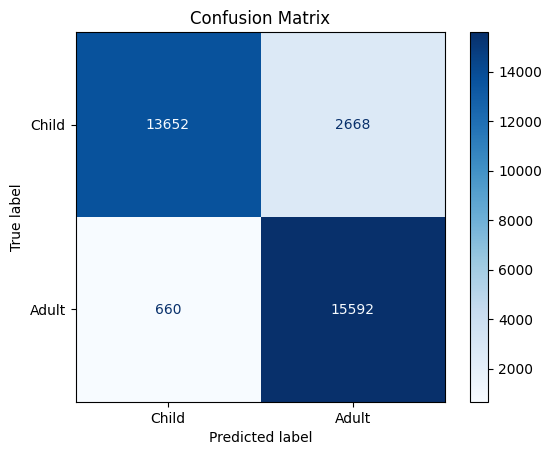

Precision: 0.8539
Recall: 0.9594
F1 Score: 0.9036


In [14]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1)

# Load and concatenate child embeddings
childEmbeddings = np.concatenate((
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBathroom.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBathroom.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBar.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBar.npy")
))

# Load and concatenate adult embeddings
adultEmbeddings = np.concatenate((
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBathroom.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBathroom.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBar.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBar.npy")
))

# Slice adult embeddings to match desired shape
adultEmbeddings = adultEmbeddings[0:16252]
print(f"Child Embeddings Shape: {childEmbeddings.shape}")
print(f"Adult Embeddings Shape: {adultEmbeddings.shape}")

# Prepare data and labels
X = np.append(childEmbeddings, adultEmbeddings, axis=0)
y = np.append(np.zeros(len(childEmbeddings)), np.ones(len(adultEmbeddings)), axis=0)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

print(f"X_tensor size: {X_tensor.size(0)}")
print(f"y_tensor size: {y_tensor.size(0)}")

# Add sequence dimension (comment this code for MLP)
X_tensor = X_tensor.unsqueeze(1)  # Shape: [32504, 1, 192]

# Get model predictions
with torch.no_grad():
    outputs = model(X_tensor)
    predicted = torch.argmax(outputs, dim=1)

# Print the predicted and actual labels (Optional)
print(f"Predicted Labels: {predicted}")
print(f"Actual Labels: {y_tensor}")

# Calculate accuracy
accuracy = (predicted == y_tensor).sum().item() / y_tensor.size(0)
print(f'Test Accuracy: {accuracy:.4f}')

# Generate confusion matrix
cm = confusion_matrix(y_tensor, predicted)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Child", "Adult"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Calculate precision, recall, and F1 score
precision = precision_score(y_tensor, predicted, average='binary')
recall = recall_score(y_tensor, predicted, average='binary')
f1 = f1_score(y_tensor, predicted, average='binary')

# Print precision, recall, and F1 score
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


In [ ]:
classifier = LogisticRegressionClassifier(768)
classifier.fit(X_train, y_train)

In [ ]:
import xgboost as xgb
import numpy as np
import torch
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Convert tensors to NumPy arrays for compatibility with XGBoost
X_train_np = X_train.numpy()
y_train_np = y_train.numpy()
X_test_np = X_test.numpy()
y_test_np = y_test.numpy()

# Set XGBoost parameters to search
param_grid = {
   'n_estimators': [500],
   'max_depth': [5],
   'learning_rate': [0.2],
   'subsample': [0.8],
   'colsample_bytree': [0.6]
}

# XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(
    tree_method='gpu_hist',  # Use GPU acceleration
    predictor='gpu_predictor',
    objective='binary:logistic',
    random_state=42
)

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search for Best Hyperparameters
print("\n[INFO] Starting hyperparameter tuning with RandomizedSearchCV...")
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=cv,
    verbose=3,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Fit Randomized Search
random_search.fit(X_train_np, y_train_np)

# Best Parameters and Best Score
best_params = random_search.best_params_
best_score = random_search.best_score_
print("\n[INFO] Best Parameters found by RandomizedSearchCV:")
print(best_params)
print(f"\n[INFO] Best Cross-Validation Accuracy: {best_score:.4f}")

# Re-train the model with the best parameters
print("\n[INFO] Training the best XGBoost model on the entire training set...")
best_model = xgb.XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    objective='binary:logistic',
    random_state=42,
    **best_params
)
best_model.fit(X_train_np, y_train_np)

# Test Predictions
print("\n[INFO] Testing the model on the test set...")
y_pred = best_model.predict(X_test_np)
accuracy = accuracy_score(y_test_np, y_pred)
print(f"\n[INFO] Test Accuracy using Best Parameters: {accuracy:.4f}")

# Print classification report
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report as a dictionary
classification_report_dict = classification_report(y_test_np, y_pred, output_dict=True)

# Convert the dictionary to a DataFrame
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Round the values to 4 significant figures
classification_report_df = classification_report_df.round(4)

# Print the formatted classification report
print("\n[INFO] Classification Report (4 Significant Figures):")
print(classification_report_df)



[INFO] Starting hyperparameter tuning with RandomizedSearchCV...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:25:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:25:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)



[INFO] Best Parameters found by RandomizedSearchCV:
{'subsample': 0.8, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.6}

[INFO] Best Cross-Validation Accuracy: 0.9788

[INFO] Training the best XGBoost model on the entire training set...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:25:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:25:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)



[INFO] Testing the model on the test set...

[INFO] Test Accuracy using Best Parameters: 0.9786

[INFO] Classification Report (4 Significant Figures):
              precision  recall  f1-score    support
0                0.9756  0.9817    0.9786  4645.0000
1                0.9816  0.9755    0.9785  4653.0000
accuracy         0.9786  0.9786    0.9786     0.9786
macro avg        0.9786  0.9786    0.9786  9298.0000
weighted avg     0.9786  0.9786    0.9786  9298.0000


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:26:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Child Embeddings Shape: (16252, 768)
Adult Embeddings Shape: (16252, 768)

[INFO] Shape of New Data (X_new): (32504, 768)
[INFO] Shape of New Labels (y_new): (32504,)

[INFO] Predicting on new data...

[INFO] Generating Confusion Matrix and Classification Report...

[INFO] Confusion Matrix:
[[12736  3516]
 [  369 15883]]

[INFO] Classification Report (Formatted to 5 decimal places):
              precision   recall  f1-score      support
0.0             0.97184  0.78366   0.86766  16252.00000
1.0             0.81875  0.97730   0.89103  16252.00000
accuracy        0.88048  0.88048   0.88048      0.88048
macro avg       0.89530  0.88048   0.87935  32504.00000
weighted avg    0.89530  0.88048   0.87935  32504.00000


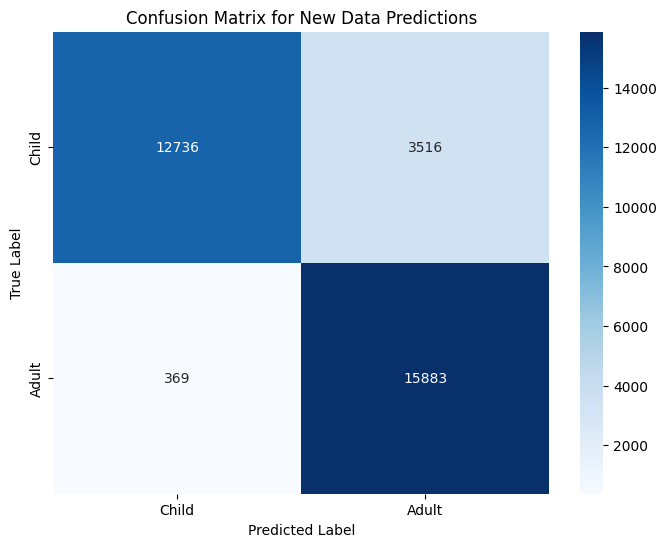

In [ ]:
import numpy as np
import torch
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Added to format classification report

# --- Step 1: Load All MyST (Child) and LibriSpeech (Adult) Embeddings ---

np.random.seed(1)

# Load all child (MyST) embeddings
childEmbeddings = np.concatenate((
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBathroom.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBar.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsStairwell.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsSupermarket.npy")
))

# Load all adult (LibriSpeech) embeddings
adultEmbeddings = np.concatenate((
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBathroom.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBar.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsStairwell.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsSupermarket.npy")
))
adultEmbeddings = adultEmbeddings[0:16252]

# Check if the shapes are consistent
print(f"Child Embeddings Shape: {childEmbeddings.shape}")
print(f"Adult Embeddings Shape: {adultEmbeddings.shape}")

# --- Step 2: Prepare Data for Prediction ---

# Combine all child and adult embeddings into one matrix
X_new = np.append(childEmbeddings, adultEmbeddings, axis=0)  # Combine feature embeddings
y_new = np.append(np.zeros(len(childEmbeddings)), np.ones(len(adultEmbeddings)), axis=0)  # 0 = Child, 1 = Adult

# Convert to NumPy arrays
X_new_np = X_new  # Already a NumPy array, no need for tensor conversion
y_new_np = y_new  # True labels for confusion matrix

print(f"\n[INFO] Shape of New Data (X_new): {X_new_np.shape}")
print(f"[INFO] Shape of New Labels (y_new): {y_new_np.shape}")

# --- Step 3: Load the Trained Model (If Needed) ---
# If best_model is already trained and available, skip this step. Otherwise, you can load it using:
# best_model = xgb.XGBClassifier()
# best_model.load_model('best_xgboost_model.json')

# --- Step 4: Predict with Trained Model on New Data ---

print("\n[INFO] Predicting on new data...")
y_new_pred = best_model.predict(X_new_np)

# --- Step 5: Generate Confusion Matrix and Classification Report ---

print("\n[INFO] Generating Confusion Matrix and Classification Report...")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_new_np, y_new_pred)

# Calculate classification report and format to 5 decimal places
classification_report_dict = classification_report(y_new_np, y_new_pred, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Format float values to 5 decimal places
classification_report_df = classification_report_df.round(5)

print("\n[INFO] Confusion Matrix:")
print(conf_matrix)

print("\n[INFO] Classification Report (Formatted to 5 decimal places):")
print(classification_report_df)

# --- Step 6: Plot the Confusion Matrix ---

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Child', 'Adult'], yticklabels=['Child', 'Adult'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for New Data Predictions')
plt.show()


In [ ]:
# Save the model to a binary file
best_model.save_model('best_xgboost_model3.json')


In [ ]:
torch.save(model.state_dict(), "model")

# **Test the model**

In [ ]:
X_train = X_train.view(-1, 1, 192)  # Add sequence dimension
X_test = X_test.view(-1, 1, 192)

In [ ]:
np.random.seed(1)

with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test Accuracy: {accuracy:.4f}')

NameError: name 'model' is not defined

In [ ]:
# Predict on new data
predictions = classifier.predict(X_test)
accuracy = classifier.evaluate(X_test, y_test)

print("Predictions:", predictions)
print("Accuracy:", accuracy)

Predictions: [1 1 1 ... 1 0 1]
Accuracy: 0.9785975478597548


In [ ]:
outputs = model(X_test)
predictions = torch.argmax(outputs, axis=1)
accuracy = (predictions == y_test).sum().item() / y_test.size(0)
print(f"Accuracy: {accuracy:.4f}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (37192x192 and 768x1)

# **Test on a different dataset**

In [ ]:
np.random.seed(1)

childEmbeddings = np.concatenate((np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBathroom.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBathroom.npy"),
                                  np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBar.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBar.npy")))
adultEmbeddings = np.concatenate((np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBathroom.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBathroom.npy"),
                                  np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBar.npy"),np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBar.npy")))
adultEmbeddings = adultEmbeddings[0:16252]
print(f"Child Embeddings Shape: {childEmbeddings.shape}")
print(f"Adult Embeddings Shape: {adultEmbeddings.shape}")

# Prepare data and labels
X = np.append(childEmbeddings, adultEmbeddings, axis=0)
y = np.append(np.zeros(len(childEmbeddings)), np.ones(len(adultEmbeddings)), axis=0)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

print(f"X_tensor size: {X_tensor.size(0)}")
print(f"y_tensor size: {y_tensor.size(0)}")

# Add sequence dimension comment this code for MLP
#X_tensor = X_tensor.unsqueeze(1)  # Shape: [32504, 1, 192]






Child Embeddings Shape: (16252, 768)
Adult Embeddings Shape: (16252, 768)
X_tensor size: 32504
y_tensor size: 32504


In [ ]:
np.random.seed(1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Get model predictions
with torch.no_grad():
    outputs = model(X_tensor)
    predicted = torch.argmax(outputs, dim=1)

# Print the predicted and actual labels (Optional)
print(f"Predicted Labels: {predicted}")
print(f"Actual Labels: {y_tensor}")

# Calculate accuracy
accuracy = (predicted == y_tensor).sum().item() / y_tensor.size(0)
print(f'Test Accuracy: {accuracy:.4f}')

# Generate confusion matrix
cm = confusion_matrix(y_tensor, predicted)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Child", "Adult"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

NameError: name 'model' is not defined

0.868754614816638


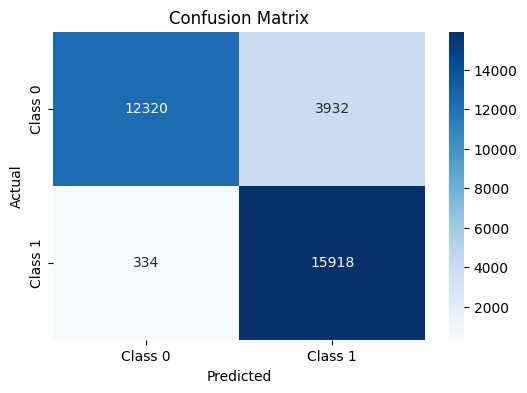

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score
# Make predictions on the test set
y_pred = classifier.predict(X_tensor)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_tensor, y_pred)

# Plot the confusion matrix

accuracy = accuracy_score(y_tensor, y_pred)
print(accuracy)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

with torch.no_grad():
    # Get model outputs and predictions
    outputs = model(X_tensor)
    predictions = torch.argmax(outputs, axis=1)
    accuracy = (predictions == y_tensor).sum().item() / y_tensor.size(0)
    print(f"Accuracy: {accuracy:.4f}")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_tensor.numpy(), predictions.numpy())

    # Display the confusion matrix as a plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Child", "Adult"])
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()


NameError: name 'model' is not defined

In [ ]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1: **Prepare new dataset from in-memory tensors**
# Ensure proper conversion from PyTorch tensor to NumPy
try:
    print("[INFO] Converting PyTorch tensors to NumPy arrays...")
    X_new_data = X_tensor.numpy().detach()  # Ensure no gradient tracking
    y_new_true = y_tensor.numpy().detach()  # Ensure no gradient tracking
    print(f"[INFO] New data shape: X_new_data: {X_new_data.shape}, y_new_true: {y_new_true.shape}")
except Exception as e:
    print(f"[ERROR] Failed to convert tensors to NumPy: {e}")
    exit()

# Check if tensors are empty
if X_new_data.size == 0 or y_new_true.size == 0:
    print("[ERROR] X_new_data or y_new_true is empty!")
    exit()

# Step 2: **Make predictions using the trained model**
try:
    print("\n[INFO] Making predictions on the entire new dataset...")
    if 'xgb_classifier' not in globals():
        raise ValueError("[ERROR] xgb_classifier is not defined or not loaded. Ensure the model is trained.")

    # Check if the model is fitted
    try:
        xgb_classifier.predict(np.array([[0] * X_new_data.shape[1]]))  # Dummy prediction to see if model is trained
    except Exception as e:
        print(f"[ERROR] Model is not fitted properly: {e}")
        exit()

    # Predict using the XGBoost classifier
    y_new_pred = xgb_classifier.predict(X_new_data)
    print("[INFO] Predictions completed successfully.")
except Exception as e:
    print(f"[ERROR] Failed to predict on new dataset: {e}")
    exit()

# Step 3: **Calculate accuracy on the new dataset**
try:
    if y_new_true.shape[0] != y_new_pred.shape[0]:
        raise ValueError("[ERROR] The shape of y_new_true and y_new_pred does not match!")

    accuracy = accuracy_score(y_new_true, y_new_pred)
    print(f"\n[INFO] Accuracy on New Dataset: {accuracy:.4f}")
except Exception as e:
    print(f"[ERROR] Failed to calculate accuracy: {e}")
    exit()

# Step 4: **Generate and Display the Confusion Matrix**
try:
    print("\n[INFO] Generating the confusion matrix...")
    cm = confusion_matrix(y_new_true, y_new_pred)

    # Display confusion matrix as a heatmap
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Child", "Adult"])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix for XGBoost on New Dataset")
    plt.show()
    print("[INFO] Confusion matrix displayed successfully.")
except Exception as e:
    print(f"[ERROR] Failed to generate and display confusion matrix: {e}")
    exit()

# Step 5: **Print classification report**
try:
    print("\n[INFO] Classification Report for New Dataset:")
    classification_report_text = classification_report(y_new_true, y_new_pred, target_names=["Child", "Adult"])
    print(classification_report_text)
except Exception as e:
    print(f"[ERROR] Failed to generate classification report: {e}")
    exit()


[INFO] Converting PyTorch tensors to NumPy arrays...
[ERROR] Failed to convert tensors to NumPy: name 'X_tensor' is not defined


NameError: name 'X_new_data' is not defined

Child Embeddings Shape: (16252, 192)
Adult Embeddings Shape: (16252, 192)

[INFO] Shape of New Data (X_new): (32504, 192)
[INFO] Shape of New Labels (y_new): (32504,)

[INFO] Predicting on new data...

[INFO] Generating Confusion Matrix and Classification Report...

[INFO] Confusion Matrix:
[[14450  1802]
 [  303 15949]]

[INFO] Classification Report (Formatted to 5 decimal places):
              precision   recall  f1-score      support
0.0             0.97946  0.88912   0.93211  16252.00000
1.0             0.89848  0.98136   0.93809  16252.00000
accuracy        0.93524  0.93524   0.93524      0.93524
macro avg       0.93897  0.93524   0.93510  32504.00000
weighted avg    0.93897  0.93524   0.93510  32504.00000


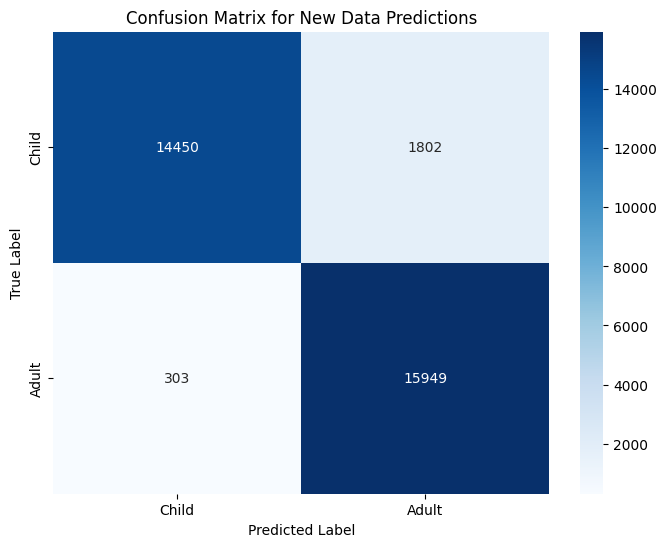

In [ ]:
import numpy as np
import torch
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Added to format classification report

# --- Step 1: Load All MyST (Child) and LibriSpeech (Adult) Embeddings ---

np.random.seed(1)

# Load all child (MyST) embeddings
childEmbeddings = np.concatenate((
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBathroom.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsBar.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsStairwell.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/mystEmbeddingsSupermarket.npy")
))

# Load all adult (LibriSpeech) embeddings
adultEmbeddings = np.concatenate((
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBathroom.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsBar.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsStairwell.npy"),
    np.load("/content/drive/MyDrive/UC_COSMOS/EmbeddingsWhisper/LibrispeechEmbeddingsSupermarket.npy")
))
adultEmbeddings = adultEmbeddings[0:16252]

# Check if the shapes are consistent
print(f"Child Embeddings Shape: {childEmbeddings.shape}")
print(f"Adult Embeddings Shape: {adultEmbeddings.shape}")

# --- Step 2: Prepare Data for Prediction ---

# Combine all child and adult embeddings into one matrix
X_new = np.append(childEmbeddings, adultEmbeddings, axis=0)  # Combine feature embeddings
y_new = np.append(np.zeros(len(childEmbeddings)), np.ones(len(adultEmbeddings)), axis=0)  # 0 = Child, 1 = Adult

# Convert to NumPy arrays
X_new_np = X_new  # Already a NumPy array, no need for tensor conversion
y_new_np = y_new  # True labels for confusion matrix

print(f"\n[INFO] Shape of New Data (X_new): {X_new_np.shape}")
print(f"[INFO] Shape of New Labels (y_new): {y_new_np.shape}")

# --- Step 3: Load the Trained Model (If Needed) ---
# If best_model is already trained and available, skip this step. Otherwise, you can load it using:
# best_model = xgb.XGBClassifier()
# best_model.load_model('best_xgboost_model.json')

# --- Step 4: Predict with Trained Model on New Data ---

print("\n[INFO] Predicting on new data...")
y_new_pred = best_model.predict(X_new_np)

# --- Step 5: Generate Confusion Matrix and Classification Report ---

print("\n[INFO] Generating Confusion Matrix and Classification Report...")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_new_np, y_new_pred)

# Calculate classification report and format to 5 decimal places
classification_report_dict = classification_report(y_new_np, y_new_pred, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Format float values to 5 decimal places
classification_report_df = classification_report_df.round(5)

print("\n[INFO] Confusion Matrix:")
print(conf_matrix)

print("\n[INFO] Classification Report (Formatted to 5 decimal places):")
print(classification_report_df)

# --- Step 6: Plot the Confusion Matrix ---

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Child', 'Adult'], yticklabels=['Child', 'Adult'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for New Data Predictions')
plt.show()
